In [1]:
## 202331279_Hania Mutia Khalisa
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Membaca gambar

In [3]:
## 202331279_Hania Mutia Khalisa
img = cv2.imread('Hania17.jpeg')  
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

## Fungsi untuk mempertahankan hanya warna tertentu

In [5]:
def keep_only_color(lower_bound, upper_bound):
    mask = cv2.inRange(img_hsv, lower_bound, upper_bound)
    result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
    white_background = np.full_like(img_rgb, 255)
    output = np.where(mask[:, :, np.newaxis] == 0, white_background, result)
    return output, mask

## Fungsi histogram RGB

In [7]:
def plot_rgb_histogram(image, mask=None, title="Histogram"):
    color = ('r', 'g', 'b')
    plt.figure(figsize=(6, 4))
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], mask, [256], [0, 256])
        plt.plot(hist, color=col)
    plt.title(title)
    plt.xlim([0, 256])
    plt.xlabel("Intensitas")
    plt.ylabel("Frekuensi")
    plt.grid()
    plt.show()

## Rentang HSV untuk warna

In [9]:
lower_blue = np.array([100, 150, 0])
upper_blue = np.array([140, 255, 255])

lower_green = np.array([40, 40, 40])
upper_green = np.array([80, 255, 255])

lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 50, 50])
upper_red2 = np.array([180, 255, 255])

## Proses deteksi warna

In [11]:
blue_output, blue_mask = keep_only_color(lower_blue, upper_blue)
green_output, green_mask = keep_only_color(lower_green, upper_green)

mask_red1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)
red_result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_red)
white_background = np.full_like(img_rgb, 255)
red_output = np.where(mask_red[:, :, np.newaxis] == 0, white_background, red_result)

## Tampilkan hasil citra

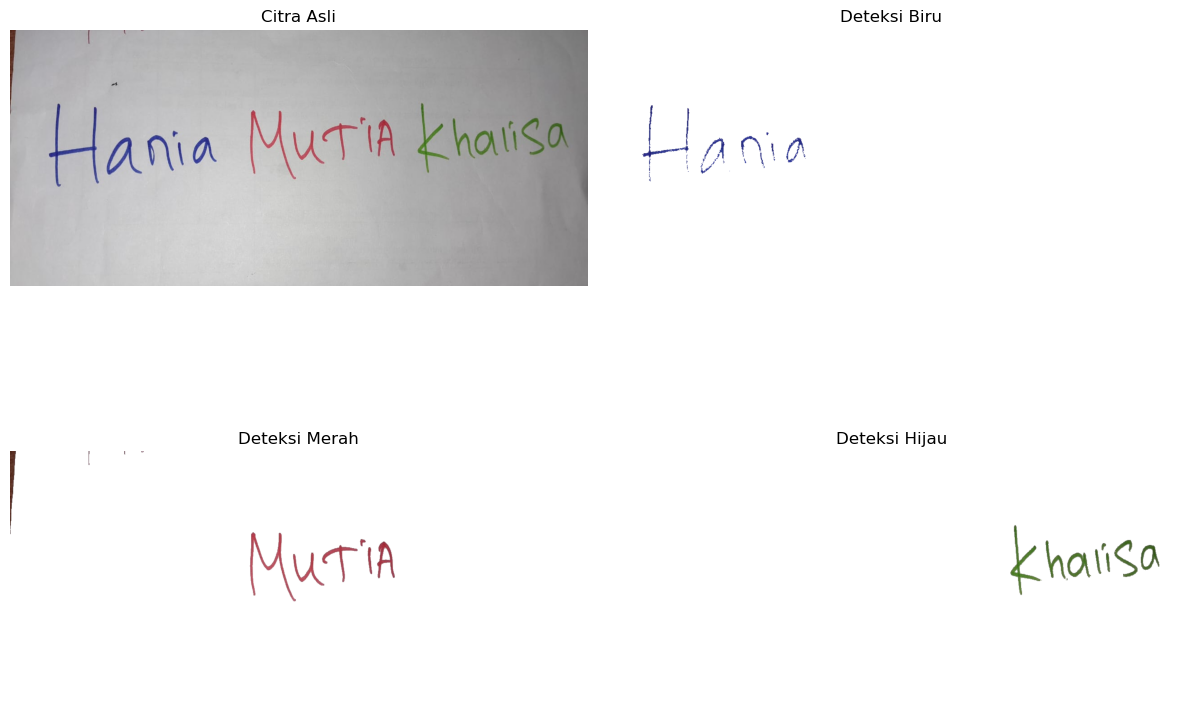

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].imshow(img_rgb)
axs[0, 0].set_title("Citra Asli")
axs[0, 0].axis('off')

axs[0, 1].imshow(blue_output)
axs[0, 1].set_title("Deteksi Biru")
axs[0, 1].axis('off')

axs[1, 0].imshow(red_output)
axs[1, 0].set_title("Deteksi Merah")
axs[1, 0].axis('off')

axs[1, 1].imshow(green_output)
axs[1, 1].set_title("Deteksi Hijau")
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

## Tampilkan histogram untuk masing-masing hasil

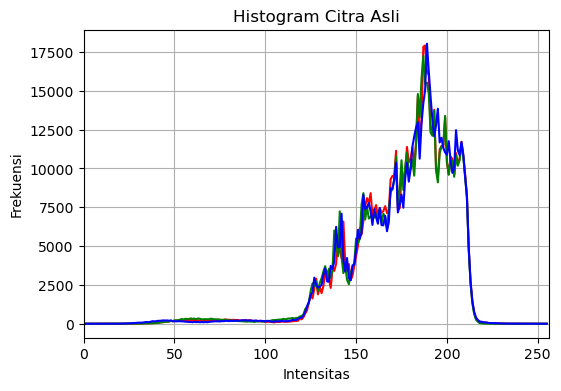

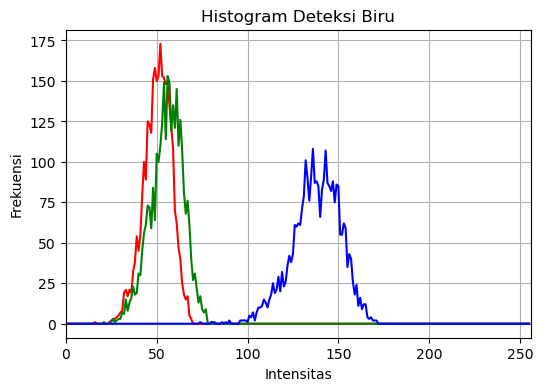

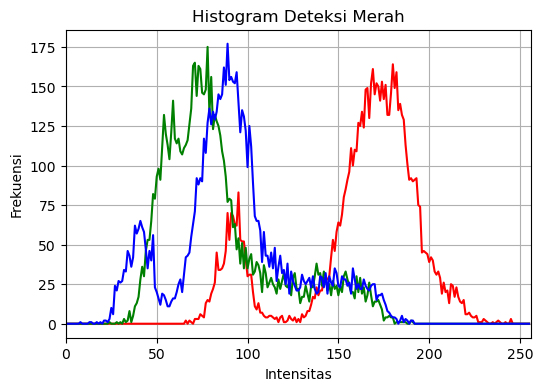

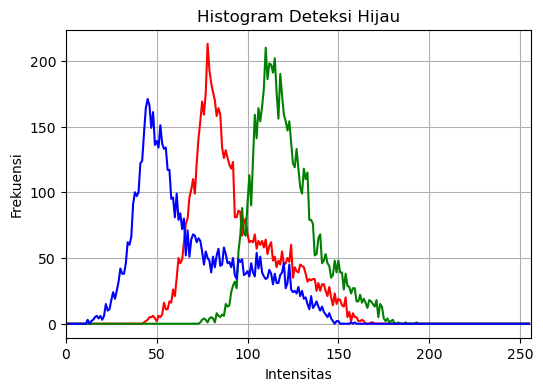

In [15]:
plot_rgb_histogram(img_rgb, None, "Histogram Citra Asli")
plot_rgb_histogram(blue_output, blue_mask, "Histogram Deteksi Biru")
plot_rgb_histogram(red_output, mask_red, "Histogram Deteksi Merah")
plot_rgb_histogram(green_output, green_mask, "Histogram Deteksi Hijau")